In [43]:
import quantecon as qe 
import numpy as np
import matplotlib.pyplot as plt
import random

In [21]:
### Define Parameters:

# Construct the markov chain using rouwenhorst method:

ρ = 0.8
n_y = 10
σ = 0.01

markov = qe.markov.approximation.rouwenhorst( n = n_y, ybar = 1-ρ, sigma=σ, rho= ρ)

# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".

Π = markov.P   
Y = markov.state_values  


In [36]:
### Finding the stationary distribution:

p = np.zeros(n_y)
p[0] = 1
for i in range(1000):
    p = p @ Π 
print(f'Stationary Distribution over endowments = ', p)
print(f'Expected Output = ', p @ Y)

Stationary Distribution over endowments =  [0.00195313 0.01757813 0.0703125  0.1640625  0.24609375 0.24609375
 0.1640625  0.0703125  0.01757813 0.00195313]
Expected Output =  1.000000000000008


In [56]:
np.linspace(0,n_y-1, n_y, dtype=int)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [71]:
for i in range(n_y):
    print(random.choices(np.linspace(0, n_y - 1, n_y, dtype=int), Π[i,:]))

[1]
[1]
[2]
[4]
[4]
[6]
[5]
[8]
[8]
[8]


In [98]:
### Finding the stationary distribution exploting erdocity:
# Create a sample plath for income:

T = 1000
Y_path = np.zeros(T, dtype = float)
Y_path_index = np.zeros(T, dtype=int)
for i in range(T):
    if i == 0:
        Y_path[i] = Y[1]
    if i > 0:
        # Given that we start anywhere, we compute a sample path for endowment.
        Y_path_index[i] = (random.choices(np.linspace(0, n_y - 1, n_y, dtype=int), Π[Y_path_index[i-1],:])[0])
        Y_path[i] = Y[Y_path_index[i]]

#fig, ax = plt.subplots(figsize=(10,10))
#plt.plot(np.linspace(1,T,T), Y_path, label = r'Prob($y_s$)')
#plt.title("Stationary Distribution for Endowments")
#plt.legend()
#plt.show()

# Compute the ergodic distribution:

unique, counts = np.unique(Y_path, return_counts=True)

# Get probabilities of ocurrence:

counts = (counts/T)

counts, p

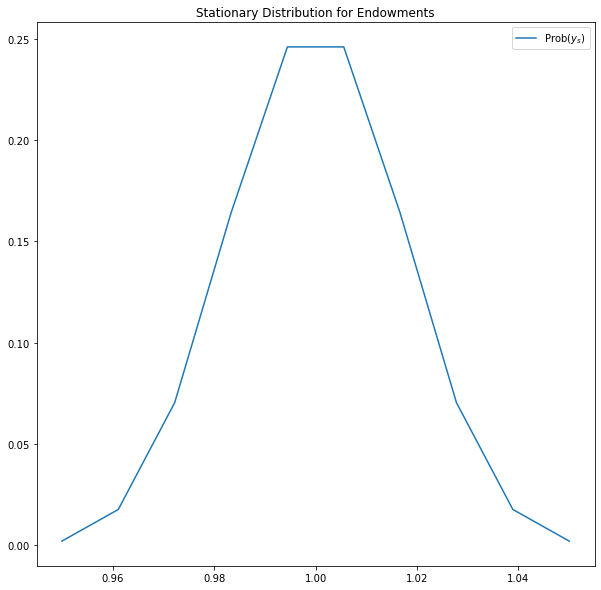

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(Y, p, label = r'Prob($y_s$)')
plt.title("Stationary Distribution for Endowments")
plt.legend()
plt.show()